In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("T:/GIT HUB PROJECTS/Cognifz Intern/Dataset .csv")

In [3]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [6]:
selected_features = ['Restaurant Name', 'Cuisines', 'City', 'Address', 'Locality', 'Rating text']
for feature in selected_features:
    df[feature] = df[feature].fillna('')

In [7]:
combined_feature = df['Restaurant Name'] + ' ' + df['Cuisines'] + ' ' + df['City'] + ' ' + df['Address'] + ' ' + df['Locality'] + ' ' + df['Rating text']

In [8]:
combined_feature 

0       Le Petit Souffle French, Japanese, Desserts Ma...
1       Izakaya Kikufuji Japanese Makati City Little T...
2       Heat - Edsa Shangri-La Seafood, Asian, Filipin...
3       Ooma Japanese, Sushi Mandaluyong City Third Fl...
4       Sambo Kojin Japanese, Korean Mandaluyong City ...
                              ...                        
9546    Naml۱ Gurme Turkish ��stanbul Kemanke�� Karamu...
9547    Ceviz A��ac۱ World Cuisine, Patisserie, Cafe �...
9548    Huqqa Italian, World Cuisine ��stanbul Kuru�_e...
9549    A���k Kahve Restaurant Cafe ��stanbul Kuru�_e�...
9550    Walter's Coffee Roastery Cafe ��stanbul Cafea�...
Length: 9551, dtype: object

In [10]:
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_feature)
print(combined_feature)

0       Le Petit Souffle French, Japanese, Desserts Ma...
1       Izakaya Kikufuji Japanese Makati City Little T...
2       Heat - Edsa Shangri-La Seafood, Asian, Filipin...
3       Ooma Japanese, Sushi Mandaluyong City Third Fl...
4       Sambo Kojin Japanese, Korean Mandaluyong City ...
                              ...                        
9546    Naml۱ Gurme Turkish ��stanbul Kemanke�� Karamu...
9547    Ceviz A��ac۱ World Cuisine, Patisserie, Cafe �...
9548    Huqqa Italian, World Cuisine ��stanbul Kuru�_e...
9549    A���k Kahve Restaurant Cafe ��stanbul Kuru�_e�...
9550    Walter's Coffee Roastery Cafe ��stanbul Cafea�...
Length: 9551, dtype: object


In [11]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(feature_vectors)


C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [20]:
user_wish = 'Walters Coffee Roastery'
user_vector = vectorizer.transform([user_wish])


In [21]:
user_scores = cosine_similarity(user_vector, feature_vectors).flatten()

In [22]:
restaurant_indices = user_scores.argsort()[::-1]

In [23]:
N = 5

In [24]:

top_recommendations = df.iloc[restaurant_indices[:N]]


In [25]:
print(top_recommendations[['Restaurant Name', 'Cuisines', 'City', 'Address', 'Locality', 'Rating text', 'Cluster']])


                     Restaurant Name                  Cuisines       City  \
9550        Walter's Coffee Roastery                      Cafe  ��stanbul   
578                 Indian By Nature                    Indian  Abu Dhabi   
7300                 Cafe Coffee Day                      Cafe  New Delhi   
8432                 Cafe Coffee Day                      Cafe      Noida   
86    Elements Coffee Co - Northwest  Coffee and Tea, Sandwich     Albany   

                                                Address             Locality  \
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...                 Moda   
578   Shop 2-3, Tolico Building, Behind Lebanese Roa...                Najda   
7300             1, DDA Market, Satyaniketan, New Delhi  Shanti Niketan Marg   
8432                             G-54, Sector 18, Noida            Sector 18   
86                2726 Ledo Rd Ste 10, Albany, GA 31707               Albany   

     Rating text  Cluster  
9550   Very Good        3  


In [26]:
#Walter's Coffee Roastery

In [27]:
sse = []
k_range = range(1, 11)






In [28]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_vectors)
    sse.append(kmeans.inertia_)

C:\Users\tharukesh\.designer\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


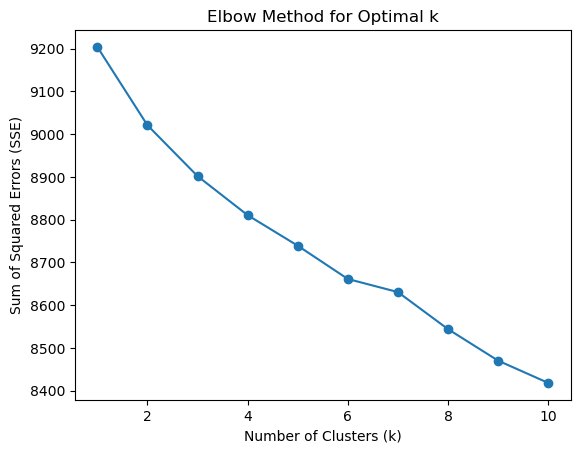

In [29]:
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [30]:
feature1 = 'Restaurant Name' 
feature2 = 'Cuisines' 




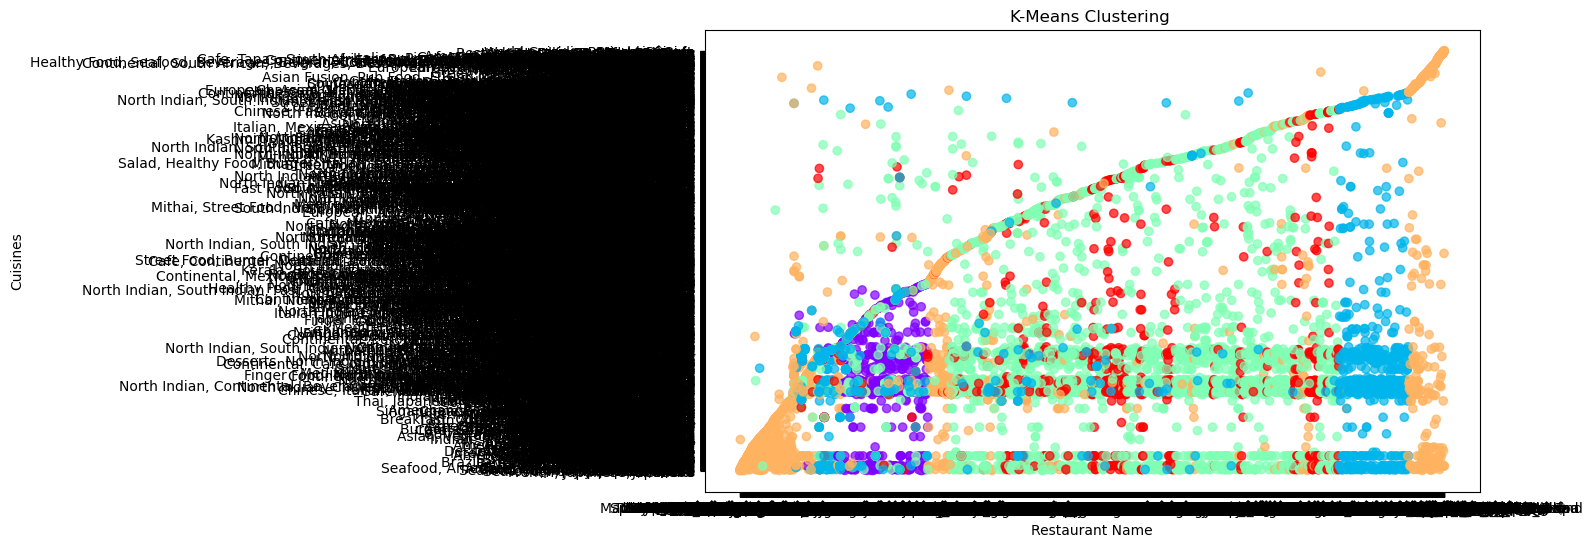

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df[feature1], df[feature2], c=df['Cluster'], cmap='rainbow', alpha=0.7)
plt.title('K-Means Clustering ')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()